Plot for complete markets

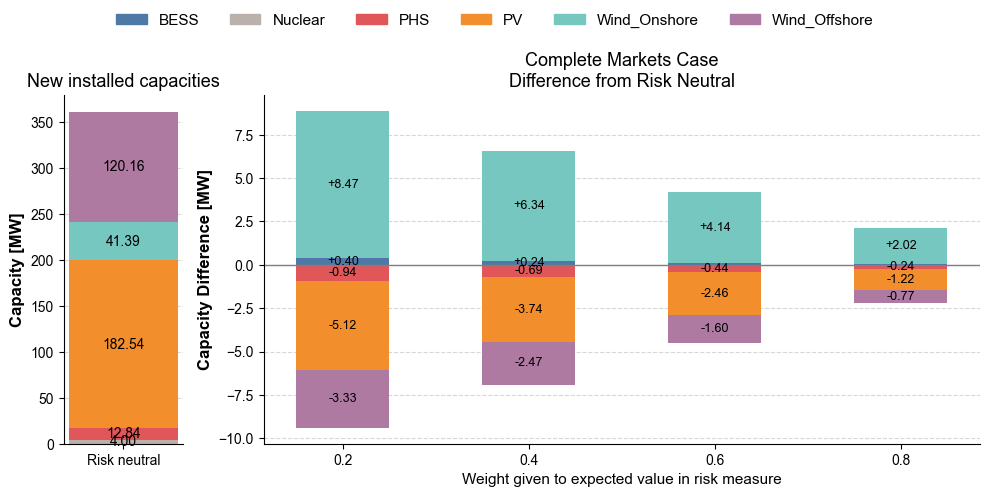

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Arial'
rcParams['axes.labelweight'] = 'bold'

# === Load data ===
df_raw = pd.read_csv("risk_aversion_results_O30_T672_new_final.csv")
df = df_raw[df_raw["delta"] != 0]

# === Filter relevant columns ===
capacity_cols = ['PV', 'Wind_Onshore', 'Wind_Offshore', 'Nuclear', 'BESS_P', 'LDES_PHS_P']
df = df[['delta'] + capacity_cols]

# === Split data ===
df_rn = df[df['delta'] == 1].iloc[0]
df_others = df[df['delta'] != 1].sort_values('delta')

# === Define techs, labels, and colors ===
techs = ['BESS_P', 'Nuclear', 'LDES_PHS_P', 'PV', 'Wind_Onshore', 'Wind_Offshore']
labels = ['BESS', 'Nuclear', 'PHS', 'PV', 'Wind_Onshore', 'Wind_Offshore']
colors = {
    'BESS_P': '#4e79a7',       # Blue
    'Wind_Offshore': '#af7aa1',          # Violet
    'Nuclear': '#bab0ac',      # Gray
    'LDES_PHS_P': '#e15759',   # Red
    'PV': '#f28e2b',           # Orange
    'Wind_Onshore': '#76c7c0',         # Teal
}

# === Plot setup ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 6]})

for ax in [ax1, ax2]:
    ax.spines[['top', 'right']].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

# === Left: Risk Neutral ===
bar_width = 0.3
bottom = 0
for tech in techs:
    value = df_rn[tech]
    ax1.bar(0, value, width=bar_width, bottom=bottom, color=colors[tech])
    if value > 0.1:
        ax1.text(0, bottom + value / 2, f'{value:.2f}', ha='center', va='center', color='black', fontsize=10)
    bottom += value
ax1.set_xticks([0])
ax1.set_xticklabels(['Risk neutral'], fontsize=10)
ax1.set_ylabel("Capacity [MW]", fontsize=12, fontweight='bold')
ax1.set_title("New installed capacities", fontsize=13, fontweight='normal')
ax1.tick_params(labelsize=10)

# === Right: Differences ===
deltas = df_others['delta'].unique()
x = np.arange(len(deltas))
width = 0.5

bottom_pos = np.zeros_like(x, dtype=float)
bottom_neg = np.zeros_like(x, dtype=float)

for tech in techs:
    diffs = df_others[tech].values - df_rn[tech]
    for i, diff in enumerate(diffs):
        if diff >= 0:
            ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            if abs(diff) > 0.1:
                ax2.text(x[i], bottom_pos[i] + diff / 2, f'+{diff:.2f}', ha='center', va='center', fontsize=9)
            bottom_pos[i] += diff
        else:
            ax2.bar(x[i], diff, width=width, bottom=bottom_neg[i], color=colors[tech])
            if abs(diff) > 0.1:
                ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9)
            bottom_neg[i] += diff

ax2.set_xticks(x)
ax2.set_xticklabels([f"{d:.1f}" for d in deltas], fontsize=10)
ax2.set_xlabel("Weight given to expected value in risk measure", fontsize=11, fontweight='normal')
ax2.set_ylabel("Capacity Difference [MW]", fontsize=12, fontweight='bold')
ax2.set_title("Complete Markets Case\nDifference from Risk Neutral", fontsize=13, fontweight='normal')
ax2.axhline(0, color='gray', linewidth=1)

# === Legend ===
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[t]) for t in techs]
fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=11, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
